**Important Note : To run the code a folder with the name Project is needed with it containing the Kaggle Api Key in Google Drive** 

Dataset Url: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

**Import Data**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.losses as losses
import tensorflow.keras.optimizers as optimizers
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Project"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Navigate to Directory With Kaggle Api Key

In [ ]:
cd /content/gdrive/MyDrive/Project

/content/gdrive/MyDrive/Project


Download Dataset and Unzip

In [ ]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data
!unzip \*.zip  && rm *.zip

heart-failure-clinical-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  heart-failure-clinical-data.zip
replace heart_failure_clinical_records_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


**Data Preprocessing**

In [ ]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.shape

(299, 13)

In [ ]:
train,validation, test = np.split(data, [int(.8 * len(data)), int(.8 * len(data))])

In [ ]:
Y = data.DEATH_EVENT

In [ ]:
features = ['age','anaemia', 'diabetes','creatinine_phosphokinase', 'ejection_fraction', 'high_blood_pressure', 'serum_sodium', 'sex', 'smoking', 'time', 'platelets']

In [ ]:
X = data[features]
X

,age,anaemia,diabetes,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_sodium,sex,smoking,time,platelets
0,75.0,0,0,582,20,1,130,1,0,4,265000.00
1,55.0,0,0,7861,38,0,136,1,0,6,263358.03
2,65.0,0,0,146,20,0,129,1,1,7,162000.00
3,50.0,1,0,111,20,0,137,1,0,7,210000.00
4,65.0,1,1,160,20,0,116,0,0,8,327000.00
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,1,61,38,1,143,1,1,270,155000.00
295,55.0,0,0,1820,38,0,139,0,0,271,270000.00
296,45.0,0,1,2060,60,0,138,0,0,278,742000.00
297,45.0,0,0,2413,38,0,140,1,1,280,140000.00


**Data Normalization**

In [ ]:
X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
Y = (Y - np.min(Y, axis=0)) / (np.max(Y, axis=0) - np.min(Y, axis=0))

In [ ]:
x_train,x_validation, x_test = np.split(X, [int(.8 * len(data)), int(.8 * len(data))])
y_train,y_validation, y_test = np.split(Y, [int(.8 * len(data)), int(.8 * len(data))])

In [ ]:
x_train

,age,anaemia,diabetes,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_sodium,sex,smoking,time,platelets
0,0.636364,0.0,0.0,0.071319,0.090909,1.0,0.485714,1.0,0.0,0.000000,0.290823
1,0.272727,0.0,0.0,1.000000,0.363636,0.0,0.657143,1.0,0.0,0.007117,0.288833
2,0.454545,0.0,0.0,0.015693,0.090909,0.0,0.457143,1.0,1.0,0.010676,0.165960
3,0.181818,1.0,0.0,0.011227,0.090909,0.0,0.685714,1.0,0.0,0.010676,0.224148
4,0.454545,1.0,1.0,0.017479,0.090909,0.0,0.085714,0.0,0.0,0.014235,0.365984
...,...,...,...,...,...,...,...,...,...,...,...
234,0.236364,1.0,0.0,0.071319,0.469697,0.0,0.685714,1.0,1.0,0.729537,0.339314
235,0.672727,1.0,0.0,0.010972,0.545455,1.0,0.685714,1.0,0.0,0.729537,0.461753
236,0.636364,0.0,0.0,0.012248,0.545455,1.0,1.000000,1.0,0.0,0.729537,0.270215
237,0.545455,0.0,0.0,0.026665,0.242424,0.0,0.542857,1.0,0.0,0.733096,0.179294


**Build Model**

In [ ]:
model = models.Sequential([
    layers.Input(shape=(11,)),
    layers.Dense(64, activation='relu', name='Hidden_Layer_1'),
    layers.Dense(32, activation='relu', name='Hidden_Layer_2'),
    layers.Dense(16, activation='relu', name='Hidden_Layer_3'),
    layers.Dense(8, activation='relu', name='Hidden_Layer_4'),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(
    loss = losses.BinaryCrossentropy(),
    optimizer = optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 64)                768       
                                                                 
 Hidden_Layer_2 (Dense)      (None, 32)                2080      
                                                                 
 Hidden_Layer_3 (Dense)      (None, 16)                528       
                                                                 
 Hidden_Layer_4 (Dense)      (None, 8)                 136       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=30, verbose=1)

Epoch 1/30
8/8 [==============================] - 1s 3ms/step - loss: 0.6942 - accuracy: 0.4770
Epoch 2/30
8/8 [==============================] - 0s 4ms/step - loss: 0.6687 - accuracy: 0.6109
Epoch 3/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6140 - accuracy: 0.6862
Epoch 4/30
8/8 [==============================] - 0s 3ms/step - loss: 0.5335 - accuracy: 0.7615
Epoch 5/30
8/8 [==============================] - 0s 3ms/step - loss: 0.4635 - accuracy: 0.7866
Epoch 6/30
8/8 [==============================] - 0s 3ms/step - loss: 0.4777 - accuracy: 0.7866
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 0.4453 - accuracy: 0.7782
Epoch 8/30
8/8 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.8117
Epoch 9/30
8/8 [==============================] - 0s 3ms/step - loss: 0.4223 - accuracy: 0.8368
Epoch 10/30
8/8 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8410
Epoch 11/30
8/8 [======================

**Test Model Using Test Data**

In [ ]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.2338 - accuracy: 0.9333


[0.2337672859430313, 0.9333333373069763]

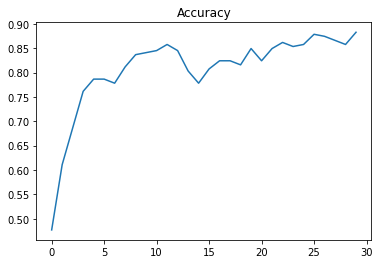

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.show()

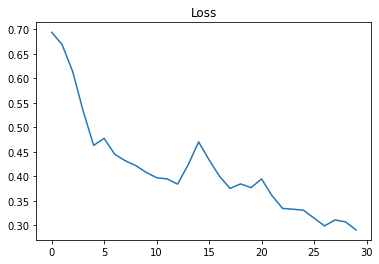

In [ ]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.show()

**Comparing Acutal Vs Predicted Death Event**

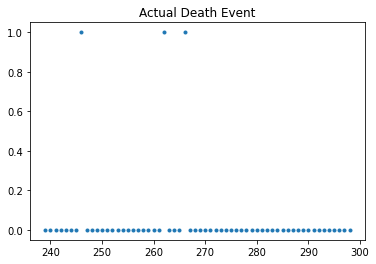

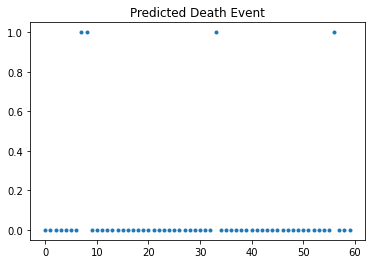

In [ ]:
prediction = model.predict(x_test)

mean = max(prediction)/2.0
prediction[prediction >= mean] = 1 
prediction[prediction < mean] = 0

plt.plot(y_test, '.')
plt.title('Actual Death Event')
plt.show()

plt.plot(prediction, '.')
plt.title('Predicted Death Event')
plt.show()

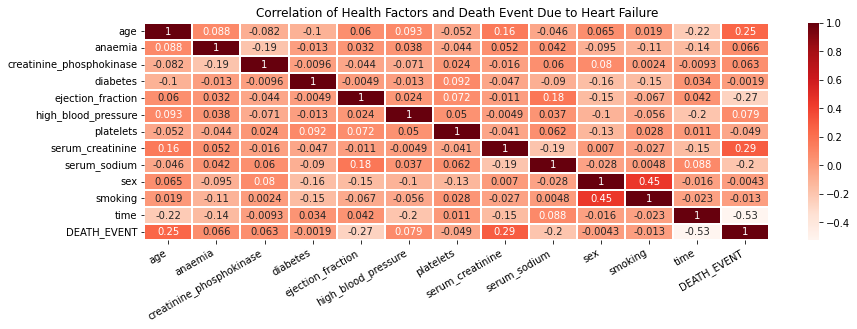

In [ ]:
  '''
The following heatmap shows the corrrelation between all the variables in our 
dataset with the death event. Time and death even have a negative correlation
which makes sense.  
'''
plt.figure(figsize=(14,4))
data_corr = data.corr()
corr_map = sns.heatmap(data_corr, linewidths=1,cmap= "Reds", annot=True)
corr_map.set_xticklabels(corr_map.get_xticklabels(),rotation = 30, ha='right')
plt.title("Correlation of Health Factors and Death Event Due to Heart Failure")
plt.show()